Significancia:

$$Z = \frac{S}{\sqrt{S+B}}$$

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

In [2]:
# Signal
cases = ["gSq_only","gSg1_only", "gSg2_only_y0y0", "gSg_only"]
data = {}
for i in cases:
    csvFile = [f"./sim_outputs/csv/DM_{i}_1.csv", f"./sim_outputs/csv/DM_{i}_2.csv"]
    data[i] = [pd.read_csv(j) for j in csvFile]

In [3]:
print("Número de Eventos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])

Número de Eventos:  [[50000, 50000], [50000, 50000], [50000, 50000], [50000, 50000]]


In [4]:
# Background
csvFile = "./background/ZpJets.csv"
data_ZpJ = pd.read_csv(csvFile)
csvFile = "./background/WpJets.csv"
data_WpJ = pd.read_csv(csvFile)

Cross-section

In [5]:
CSs = {}
for i in cases:
    CSs[f"{i}"] = []
    CSs[f"error{i}"] = []

In [7]:
outFile = "sim_outputs/log.out"
outData = open(outFile, "r")
outText = outData.read()
outData.close()

In [8]:
indexCS = outText.find('Cross-section :   ')
indexPM = outText.find(' +- ', indexCS)
indexPB = outText.find(' pb', indexCS)
counter = 0
repCount = True
run = 1
while indexCS != -1:
    if repCount:
        repCount = False
    else:
        #print("Cross-section: ", outText[indexCS+18:indexPM])
        #print("errorbar :", outText[indexPM+4:indexPB])
        CSs[f"{cases[counter]}"].append(float(outText[indexCS+18:indexPM]))
        CSs[f"error{cases[counter]}"].append(float(outText[indexPM+4:indexPB]))
        match run:
            case 1:
                run = 2
            case 2:
                run = 1
                counter +=1
        repCount = True
    indexCS = outText.find('Cross-section :   ', indexCS+1)
    indexPM = outText.find(' +- ', indexCS)
    indexPB = outText.find(' pb', indexCS)
print(counter)

4


In [9]:
CSs

{'gSq_only': [0.0008833, 3.692e-05],
 'errorgSq_only': [1.722e-06, 7.012e-08],
 'gSg1_only': [41.16, 6.965],
 'errorgSg1_only': [0.06192, 0.01127],
 'gSg2_only_y0y0': [0.002104, 0.0001629],
 'errorgSg2_only_y0y0': [3.224e-06, 2.454e-07],
 'gSg_only': [41.2, 6.972],
 'errorgSg_only': [0.06122, 0.01005]}

Significance

In [22]:
pt_values = {}
Z = {}
for i in cases:
    pt_values[i] = []
    Z[i] = []
    for j in range(2):
        pt_values[i].append(np.linspace(data[i][j]['jet_pt0'].min(), data[i][j]['jet_pt0'].max(),100))
        Z[i].append(np.zeros(len(pt_values[i][j])))

        for k in range(len(pt_values[i][j])):
            S = data[i][j][data[i][j]['jet_pt0'] > pt_values[i][j][k]].shape[0]
            B = data_WpJ[data_WpJ['jet_pt0'] > pt_values[i][j][k]].shape[0] + data_ZpJ[data_ZpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]

            Z[i][j][k] = S/np.sqrt(S+B)

/tmp/ipykernel_6350/3074437684.py:14: RuntimeWarning: invalid value encountered in double_scalars
  Z[i][j][k] = S/np.sqrt(S+B)


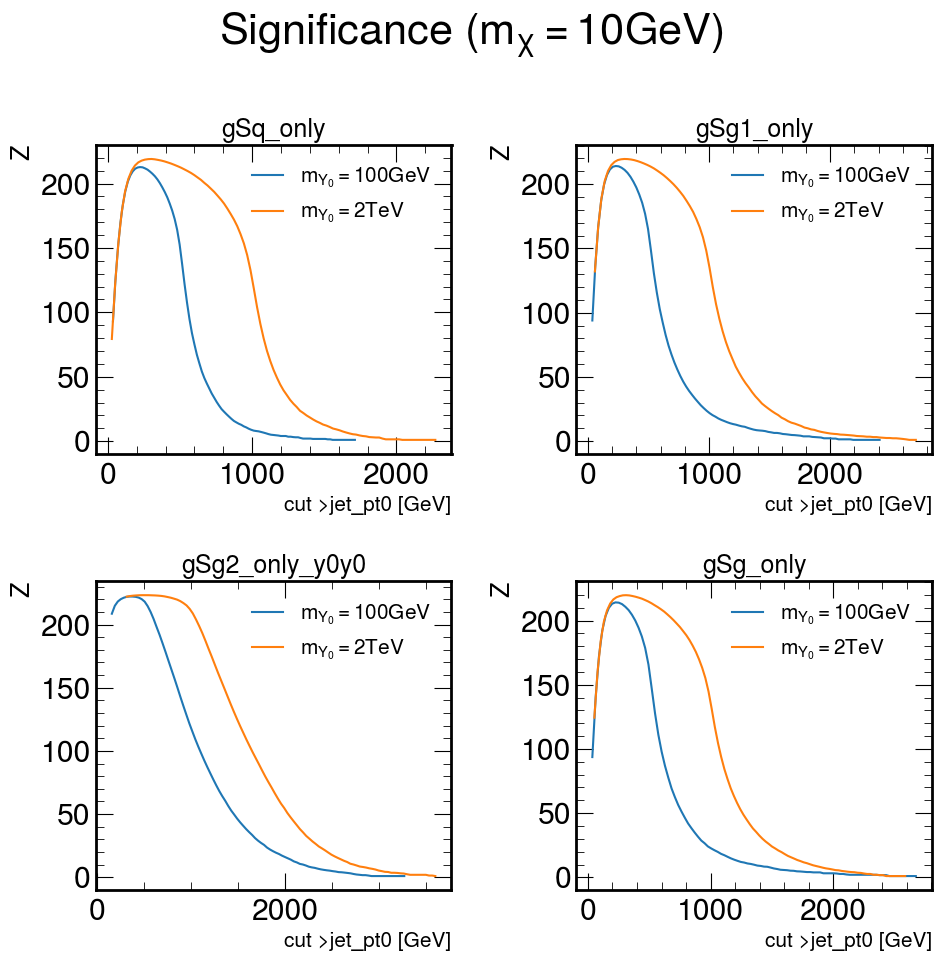

In [23]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,1000)

fig.tight_layout()
plt.show()

Acotamos el area de busqueda

In [24]:
pt_values = {}
Z = {}
for i in cases:
    pt_values[i] = []
    Z[i] = []
    for j in range(2):
        inf_lim = data[i][j]['jet_pt0'].min()
        sup_lim = 1000 if data[i][j]['jet_pt0'].max() > 1000 else data[i][j]['jet_pt0'].max()
        pt_values[i].append(np.linspace(inf_lim, sup_lim, 500))
        Z[i].append(np.zeros(len(pt_values[i][j])))

        for k in range(len(pt_values[i][j])):
            S = data[i][j][data[i][j]['jet_pt0'] > pt_values[i][j][k]].shape[0]
            B = data_WpJ[data_WpJ['jet_pt0'] > pt_values[i][j][k]].shape[0] + data_ZpJ[data_ZpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]

            Z[i][j][k] = S/np.sqrt(S+B)

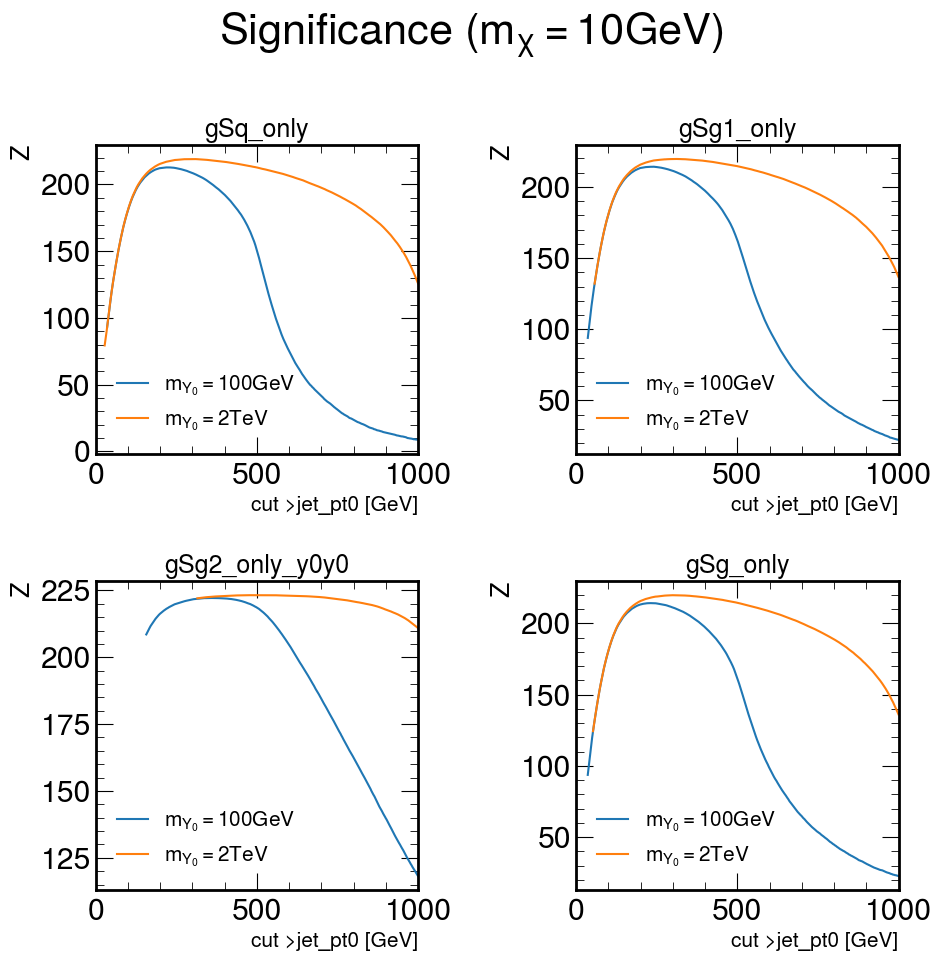

In [25]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1000)
        #ax[i,j].set_ylim()

fig.tight_layout()
plt.show()

Entonces aquí buscamos el valor máximo de la significancia para cada caso

In [26]:
cuts = {}
for i in cases:
    print("case: ",i)
    cuts[i] = []
    for j in range(2):
        my0 = "100GeV" if j==0 else "2TeV"
        print(f"\tfor my0={my0}")
        maxZ = max(Z[i][j])
        max_index = Z[i][j].argmax()
        cut = pt_values[i][j][max_index]
        cuts[i].append(cut)
        print("\t\tmax significance: ", max(Z[i][j]))
        print("\t\tcut: jet_pt0 > ",round(cut,3),"GeV")       

case:  gSq_only
	for my0=100GeV
		max significance:  212.83297149849327
		cut: jet_pt0 >  223.113 GeV
	for my0=2TeV
		max significance:  219.13170608191624
		cut: jet_pt0 >  298.675 GeV
case:  gSg1_only
	for my0=100GeV
		max significance:  214.21416503265039
		cut: jet_pt0 >  238.909 GeV
	for my0=2TeV
		max significance:  219.63485152392258
		cut: jet_pt0 >  304.747 GeV
case:  gSg2_only_y0y0
	for my0=100GeV
		max significance:  222.18377729828885
		cut: jet_pt0 >  358.065 GeV
	for my0=2TeV
		max significance:  223.2357495207531
		cut: jet_pt0 >  492.475 GeV
case:  gSg_only
	for my0=100GeV
		max significance:  214.24844859258366
		cut: jet_pt0 >  229.155 GeV
	for my0=2TeV
		max significance:  219.82132843392753
		cut: jet_pt0 >  304.882 GeV


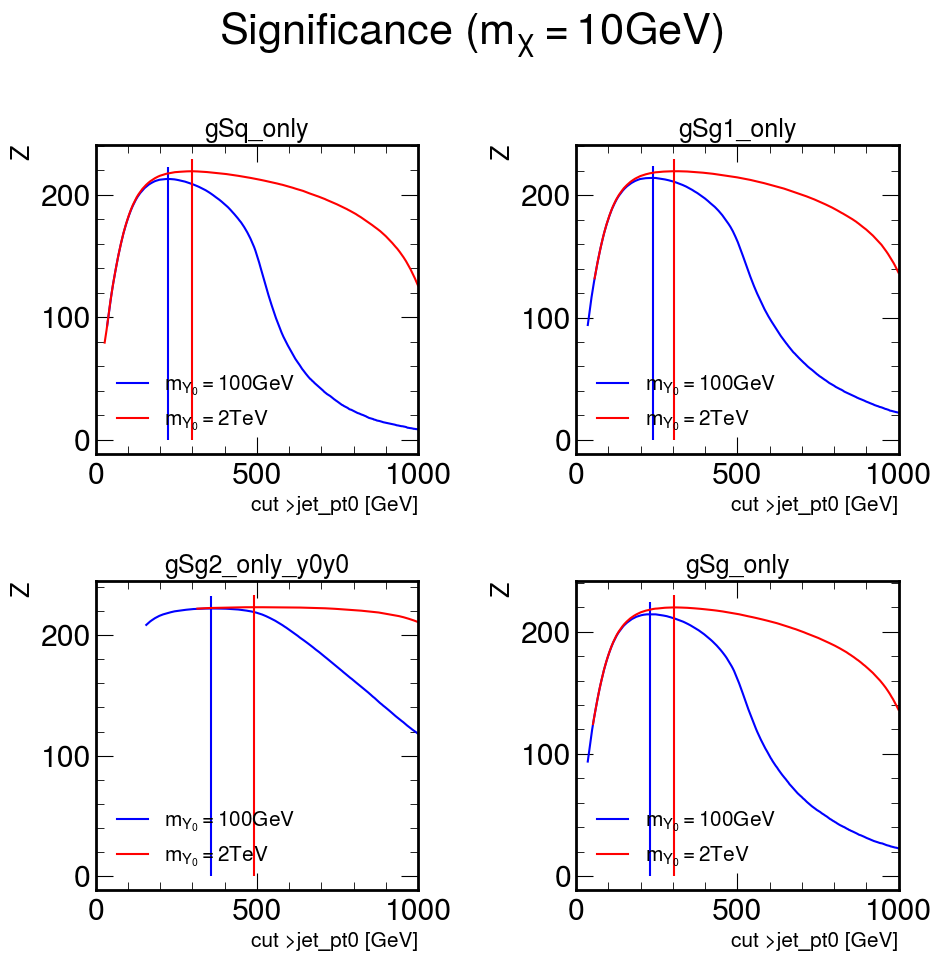

In [27]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

colors = ["b","r"]
labels = [r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i],color=colors[i], label=labels[i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i],color=colors[i], label=labels[i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i],color=colors[i], label=labels[i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i],color=colors[i], label=labels[i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=max(Z[cases[0]][i])+10,color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=max(Z[cases[1]][i])+10,color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=max(Z[cases[2]][i])+10,color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=max(Z[cases[3]][i])+10,color=colors[i])

for i in range(2):
    for j in range(2):
        ax[i,j].legend(fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1000)
        #ax[i,j].set_ylim()

fig.tight_layout()
plt.show()

In [28]:
cut_data1 = {}
dataWpJ_cut1 = {}
dataZpJ_cut1 = {}
for i in cases:
    cut_data1[i] = []
    dataWpJ_cut1[i] = []
    dataZpJ_cut1[i] = []
    for j in range(2):
        cut_data1[i].append(data[i][j][data[i][j]['jet_pt0'] > cuts[i][j]].copy())
        dataWpJ_cut1[i].append(data_WpJ[data_WpJ['jet_pt0'] > cuts[i][j]].copy())
        dataZpJ_cut1[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > cuts[i][j]].copy())

In [29]:
print("Número de Eventos (original): ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("Número de Eventos Background WpJets + ZpJets (original): ",[data_WpJ.shape[0], data_ZpJ.shape[0]])
print("Número de Eventos (cut1): ",[[cut_data1[i][j].shape[0] for j in range(2)] for i in cases])
print("Número de Eventos Background WpJets (cut1): ",[[dataWpJ_cut1[i][j].shape[0] for j in range(2)] for i in cases])
print("Número de Eventos Background ZpJets (cut1): ",[[dataZpJ_cut1[i][j].shape[0] for j in range(2)] for i in cases])

Número de Eventos (original):  [[50000, 50000], [50000, 50000], [50000, 50000], [50000, 50000]]
Número de Eventos Background WpJets + ZpJets (original):  [825253, 798133]
Número de Eventos (cut1):  [[47579, 48859], [47689, 49015], [49789, 49934], [47995, 49096]]
Número de Eventos Background WpJets (cut1):  [[1099, 365], [854, 332], [178, 49], [995, 332]]
Número de Eventos Background ZpJets (cut1):  [[1297, 490], [1018, 456], [249, 51], [1193, 455]]


Observamos la diferencia al aplicar los pesos, teniendo que

$$W = \frac{N_{fisicos}}{N_{MG+Pythia}}$$

In [30]:
Weights = pd.read_csv("BGweigths.csv").to_dict()

for i in cases:
    Weights[i] = []
    for j in range(2):
        Weights[i].append(CSs[i][j]*1000*300/data[i][j].shape[0])

In [31]:
Weights['WpJets'] = Weights['WpJets'][0]
Weights['ZpJets'] = Weights['ZpJets'][0]
Weights.pop('Unnamed: 0')

{0: 0}

In [32]:
Weights

{'WpJets': 11608.440078375965,
 'ZpJets': 3335.515509319875,
 'gSq_only': [0.0052998, 0.00022152],
 'gSg1_only': [246.96, 41.79],
 'gSg2_only_y0y0': [0.012624000000000002, 0.0009774],
 'gSg_only': [247.2, 41.832]}

In [33]:
pt_values = {}
Z = {}
for i in cases:
    pt_values[i] = []
    Z[i] = []
    for j in range(2):
        pt_values[i].append(np.linspace(data[i][j]['jet_pt0'].min(), data[i][j]['jet_pt0'].max(),100))
        Z[i].append(np.zeros(len(pt_values[i][j])))

        for k in range(len(pt_values[i][j])):
            S = data[i][j][data[i][j]['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights[i][j]
            B = data_WpJ[data_WpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights['WpJets'] + data_ZpJ[data_ZpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights['ZpJets']

            Z[i][j][k] = S/np.sqrt(S+B)

/tmp/ipykernel_6350/3593911903.py:14: RuntimeWarning: invalid value encountered in double_scalars
  Z[i][j][k] = S/np.sqrt(S+B)


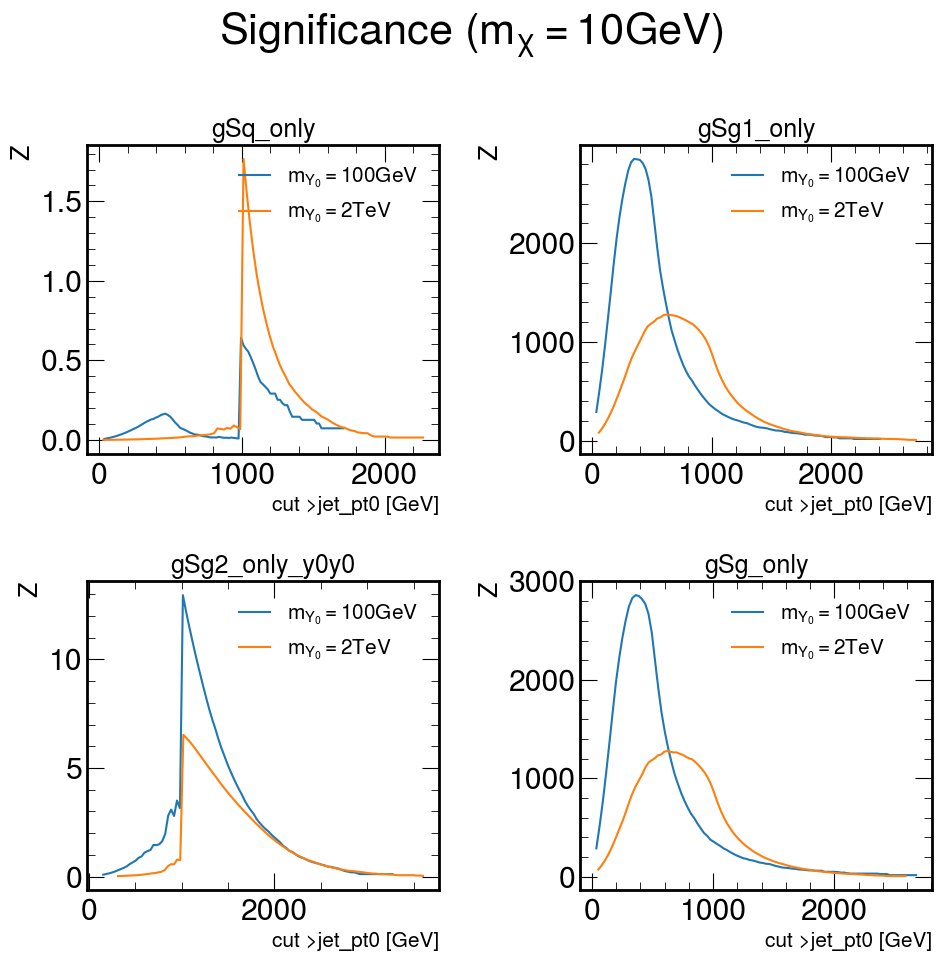

In [34]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

Acotamos el rango de busqueda

In [40]:
pt_values = {}
Z = {}
for i in cases:
    pt_values[i] = []
    Z[i] = []
    for j in range(2):
        inf_lim = data[i][j]['jet_pt0'].min()
        sup_lim = 1500 if data[i][j]['jet_pt0'].max() > 1500 else data[i][j]['jet_pt0'].max()
        pt_values[i].append(np.linspace(inf_lim, sup_lim,500))
        Z[i].append(np.zeros(len(pt_values[i][j])))

        for k in range(len(pt_values[i][j])):
            S = data[i][j][data[i][j]['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights[i][j]
            B = data_WpJ[data_WpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights['WpJets'] + data_ZpJ[data_ZpJ['jet_pt0'] > pt_values[i][j][k]].shape[0]*Weights['ZpJets']

            Z[i][j][k] = S/np.sqrt(S+B)

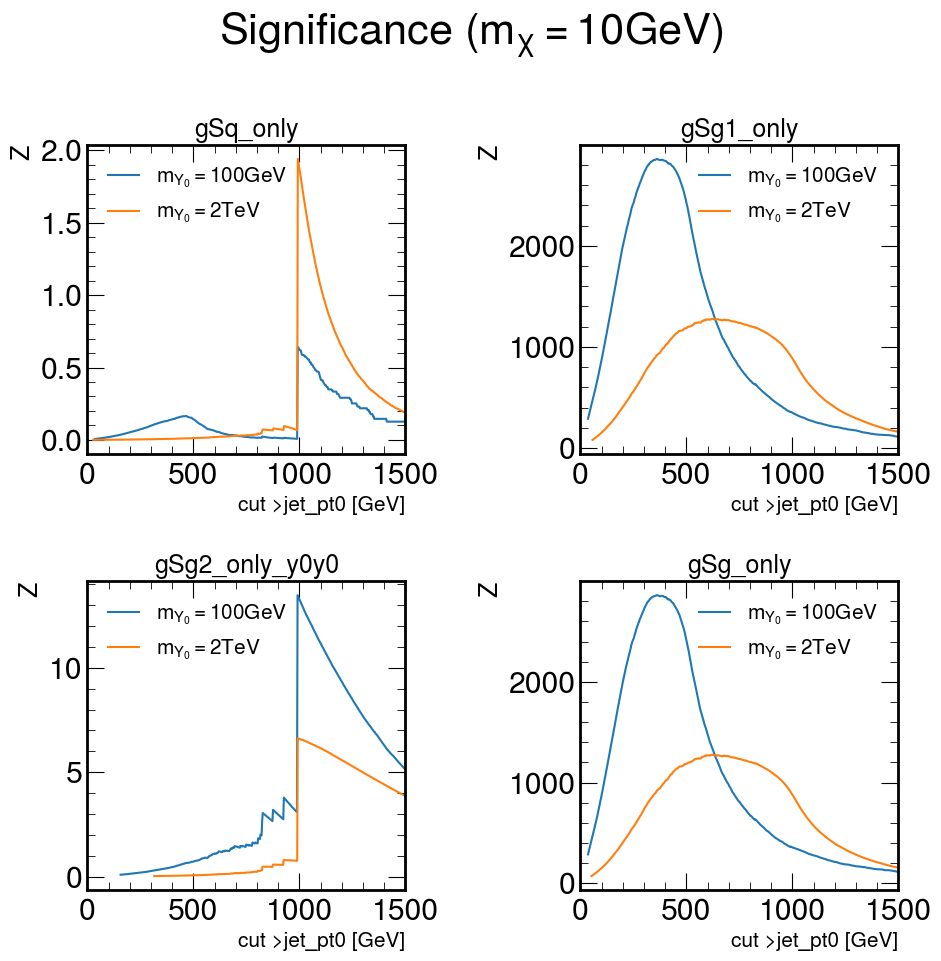

In [41]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1500)

fig.tight_layout()
plt.show()

In [42]:
cuts = {}
for i in cases:
    print("case: ",i)
    cuts[i] = []
    for j in range(2):
        my0 = "100GeV" if j==0 else "2TeV"
        print(f"\tfor my0={my0}")
        maxZ = max(Z[i][j])
        max_index = Z[i][j].argmax()
        cut = pt_values[i][j][max_index]
        cuts[i].append(cut)
        print("\t\tmax significance: ", max(Z[i][j]))
        print("\t\tcut: jet_pt0 > ",round(cut,3),"GeV")       

case:  gSq_only
	for my0=100GeV
		max significance:  0.642949764756159
		cut: jet_pt0 >  992.321 GeV
	for my0=2TeV
		max significance:  1.9413761304806445
		cut: jet_pt0 >  992.578 GeV
case:  gSg1_only
	for my0=100GeV
		max significance:  2859.7722594328748
		cut: jet_pt0 >  358.788 GeV
	for my0=2TeV
		max significance:  1277.857086945899
		cut: jet_pt0 >  621.052 GeV
case:  gSg2_only_y0y0
	for my0=100GeV
		max significance:  13.475764913354642
		cut: jet_pt0 >  991.343 GeV
	for my0=2TeV
		max significance:  6.620315007611042
		cut: jet_pt0 >  992.03 GeV
case:  gSg_only
	for my0=100GeV
		max significance:  2860.235769061054
		cut: jet_pt0 >  361.629 GeV
	for my0=2TeV
		max significance:  1277.5991904347452
		cut: jet_pt0 >  620.927 GeV


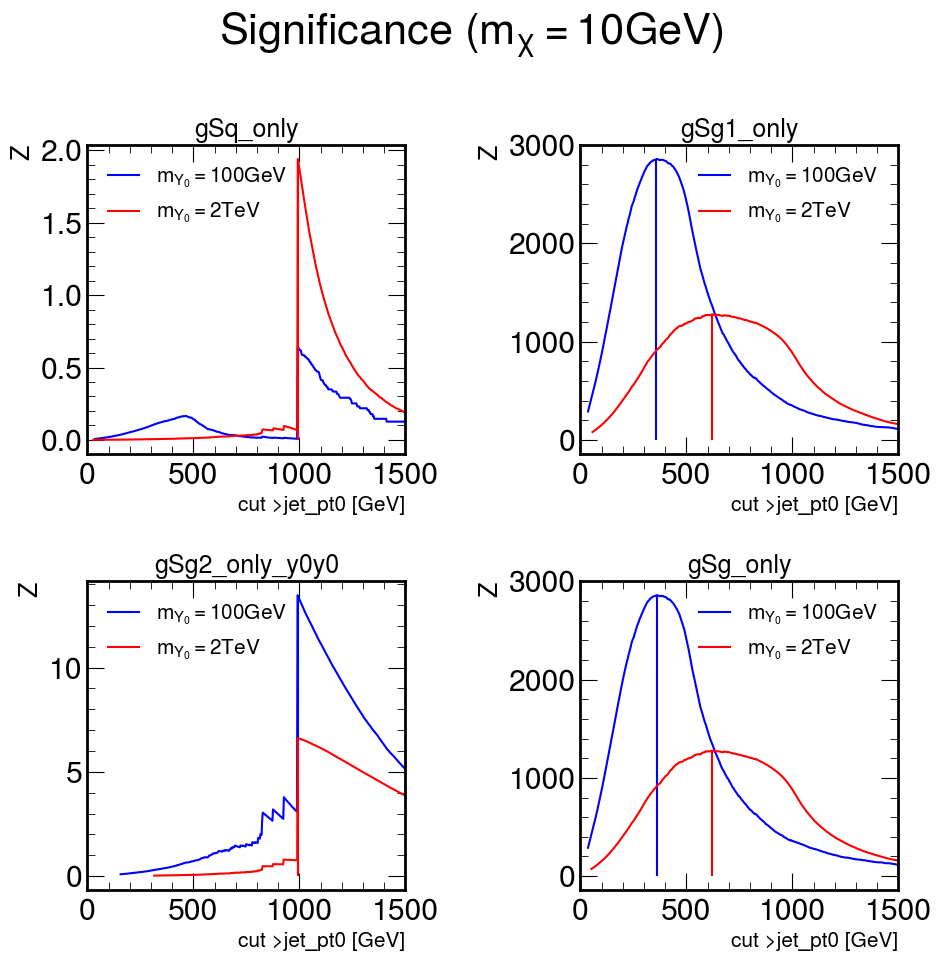

In [45]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

colors = ["b","r"]
labels = [r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i],color=colors[i], label=labels[i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i],color=colors[i], label=labels[i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i],color=colors[i], label=labels[i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i],color=colors[i], label=labels[i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=max(Z[cases[0]][i]),color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=max(Z[cases[1]][i]),color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=max(Z[cases[2]][i]),color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=max(Z[cases[3]][i]),color=colors[i])

for i in range(2):
    for j in range(2):
        ax[i,j].legend(fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1500)

fig.tight_layout()
plt.show()

In [46]:
cut_data2 = {}
dataWpJ_cut2 = {}
dataZpJ_cut2 = {}
for i in cases:
    cut_data2[i] = []
    dataWpJ_cut2[i] = []
    dataZpJ_cut2[i] = []
    for j in range(2):
        cut_data2[i].append(data[i][j][data[i][j]['jet_pt0'] > cuts[i][j]].copy())
        dataWpJ_cut2[i].append(data_WpJ[data_WpJ['jet_pt0'] > cuts[i][j]].copy())
        dataZpJ_cut2[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > cuts[i][j]].copy())

In [47]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])
print("\tCut1")
print("Modelos: ",[[cut_data1[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets: ",[[dataWpJ_cut1[i][j].shape[0] for j in range(2)] for i in cases])
print("ZpJets: ",[[dataZpJ_cut1[i][j].shape[0] for j in range(2)] for i in cases])
print("\tCut2")
print("Modelos): ",[[cut_data2[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets: ",[[dataWpJ_cut2[i][j].shape[0] for j in range(2)] for i in cases])
print("ZpJets: ",[[dataZpJ_cut2[i][j].shape[0] for j in range(2)] for i in cases])
print("\nOrden: ","gSg_only", "gSg1_only", "gSg2_only_y0y0", "gSq_only")

Número de Eventos para cada caso:
	Original
Modelos:  [[50000, 50000], [50000, 50000], [50000, 50000], [50000, 50000]]
WpJets + ZpJets:  [825253, 798133]
	Cut1
Modelos:  [[47579, 48859], [47689, 49015], [49789, 49934], [47995, 49096]]
WpJets:  [[1099, 365], [854, 332], [178, 49], [995, 332]]
ZpJets:  [[1297, 490], [1018, 456], [249, 51], [1193, 455]]
	Cut2
Modelos):  [[78, 17014], [42269, 42944], [14385, 44842], [42048, 42885]]
WpJets:  [[0, 0], [177, 11], [0, 0], [173, 11]]
ZpJets:  [[0, 0], [249, 15], [0, 0], [241, 15]]

Orden:  gSg_only gSg1_only gSg2_only_y0y0 gSq_only


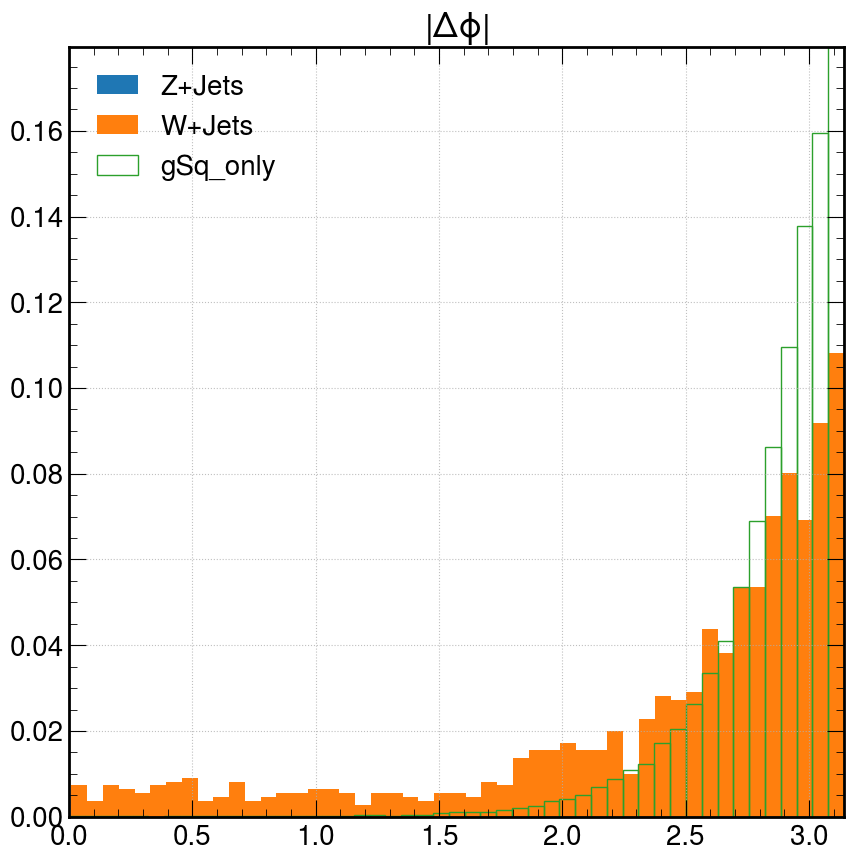

/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \
/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \


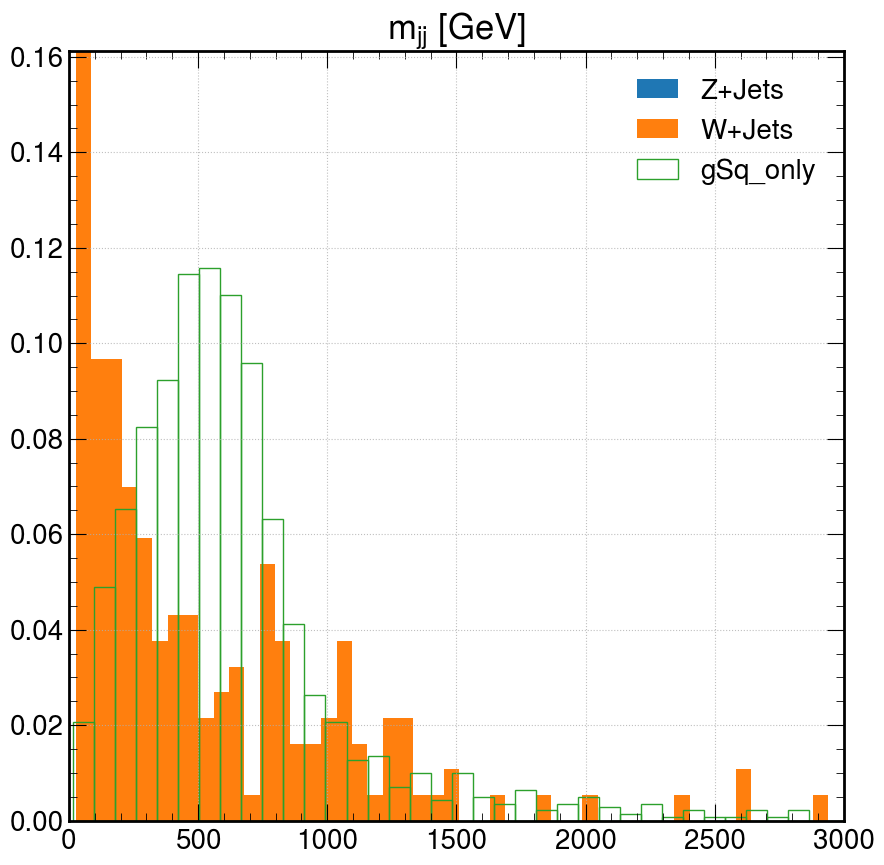

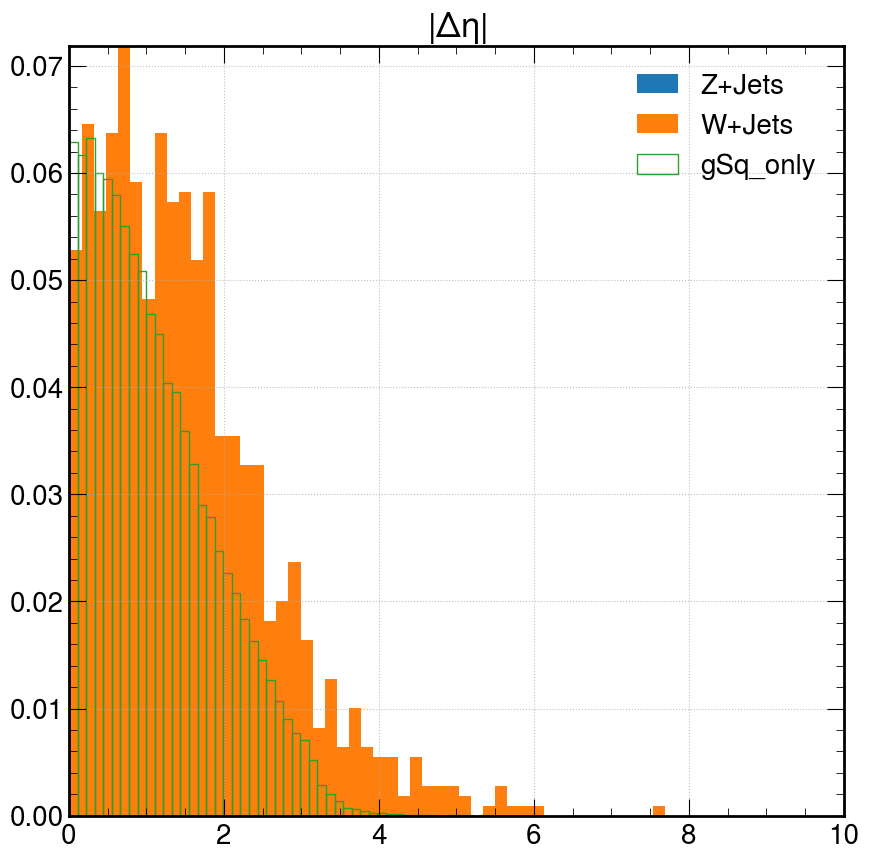

In [48]:
datas = [dataWpJ_cut1['gSq_only'][0], dataWpJ_cut1['gSq_only'][0], cut_data1['gSq_only'][0]]
names = ['Z+Jets','W+Jets','gSq_only']
plotObservable(datas, names, 'Azim_diff', save=False, plot=True)
plotObservable(datas, names, 'Inv_mass', save=False, plot=True)
plotObservable(datas, names, 'Pseudorapidity', save=False, plot=True)

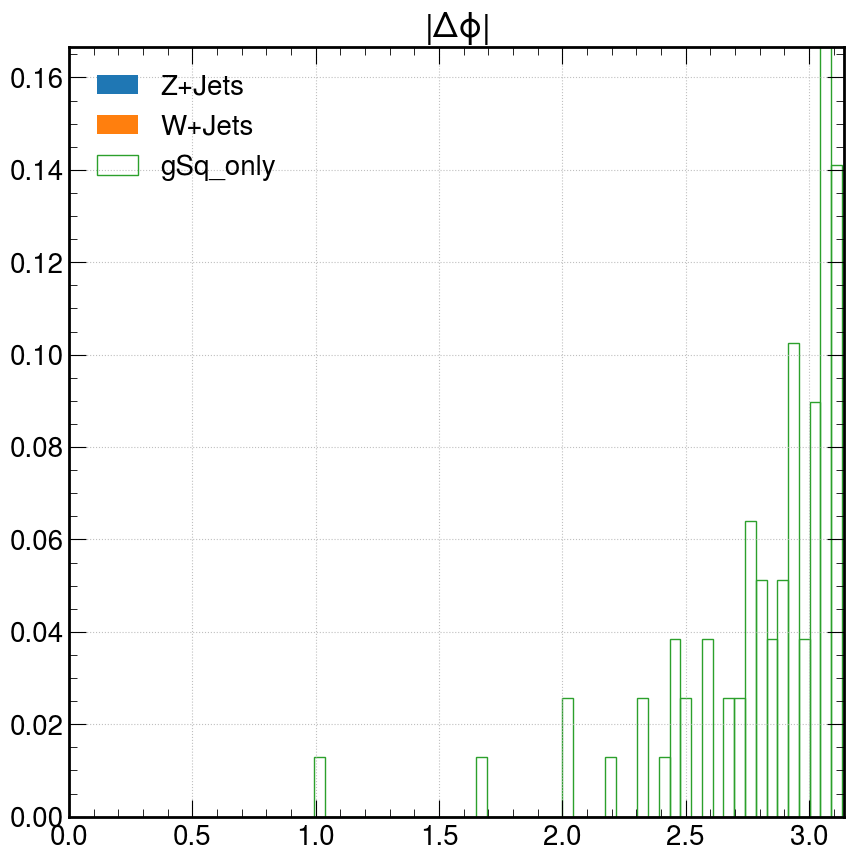

/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \
/home/juan/Documents/GitHub/VBFDM_EAFIT/.venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/juan/Documents/GitHub/VBFDM_EAFIT/.venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:170: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0,majorValue)


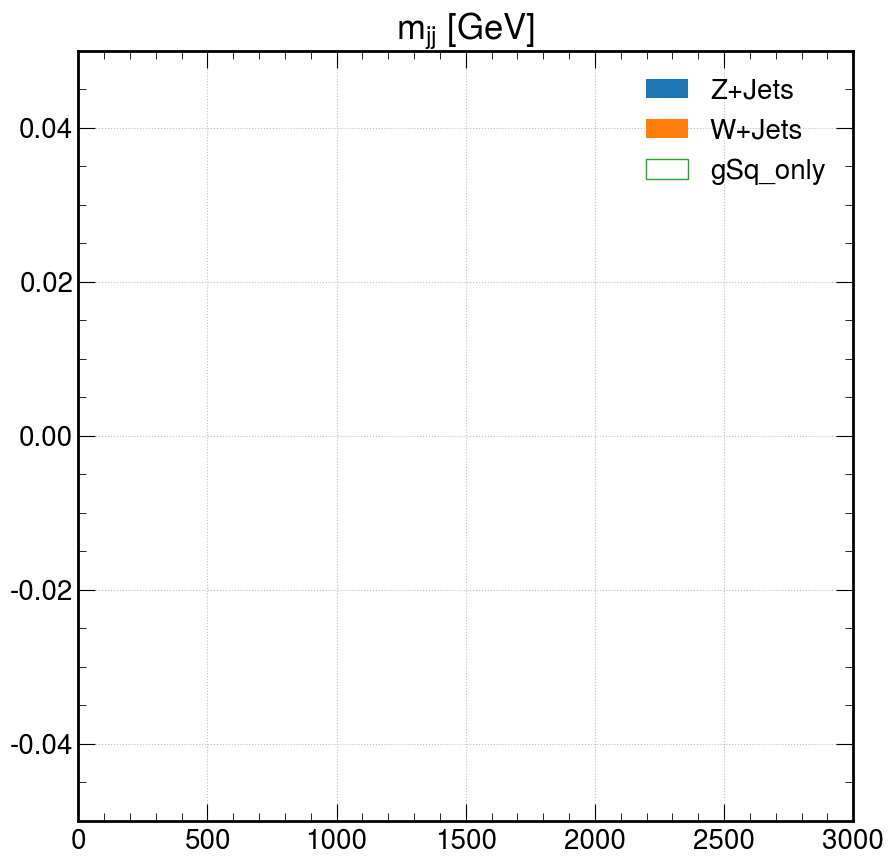

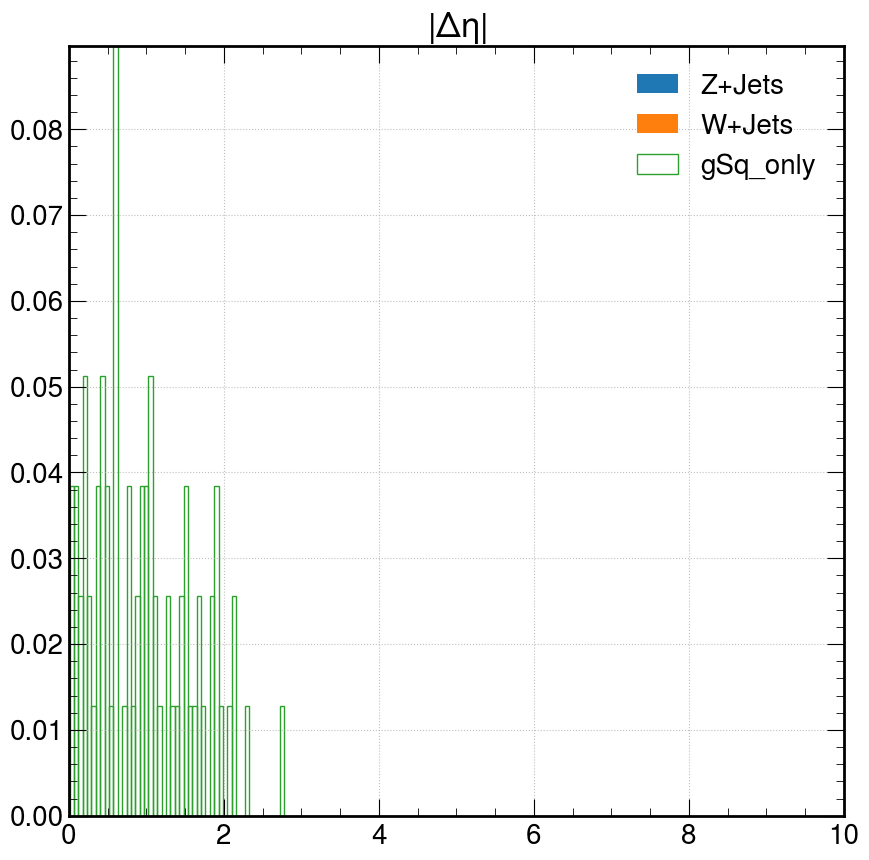

In [49]:
datas = [dataWpJ_cut2['gSq_only'][0], dataWpJ_cut2['gSq_only'][0], cut_data2['gSq_only'][0]]
names = ['Z+Jets','W+Jets','gSq_only']
plotObservable(datas, names, 'Azim_diff', save=False, plot=True)
plotObservable(datas, names, 'Inv_mass', save=False, plot=True)
plotObservable(datas, names, 'Pseudorapidity', save=False, plot=True)

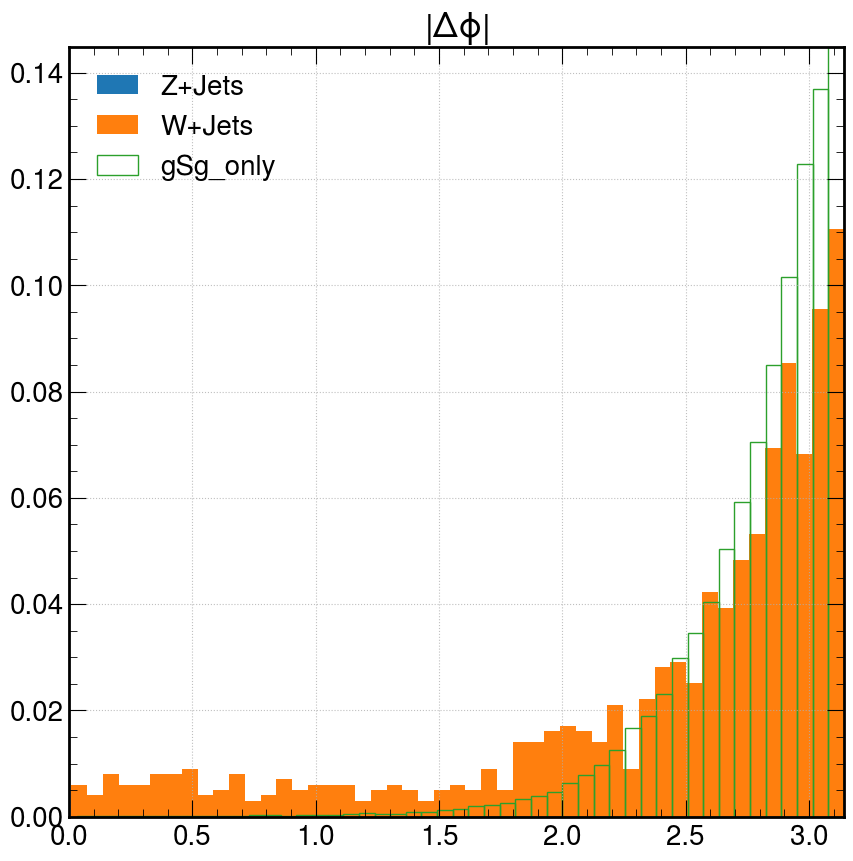

/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \
/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \


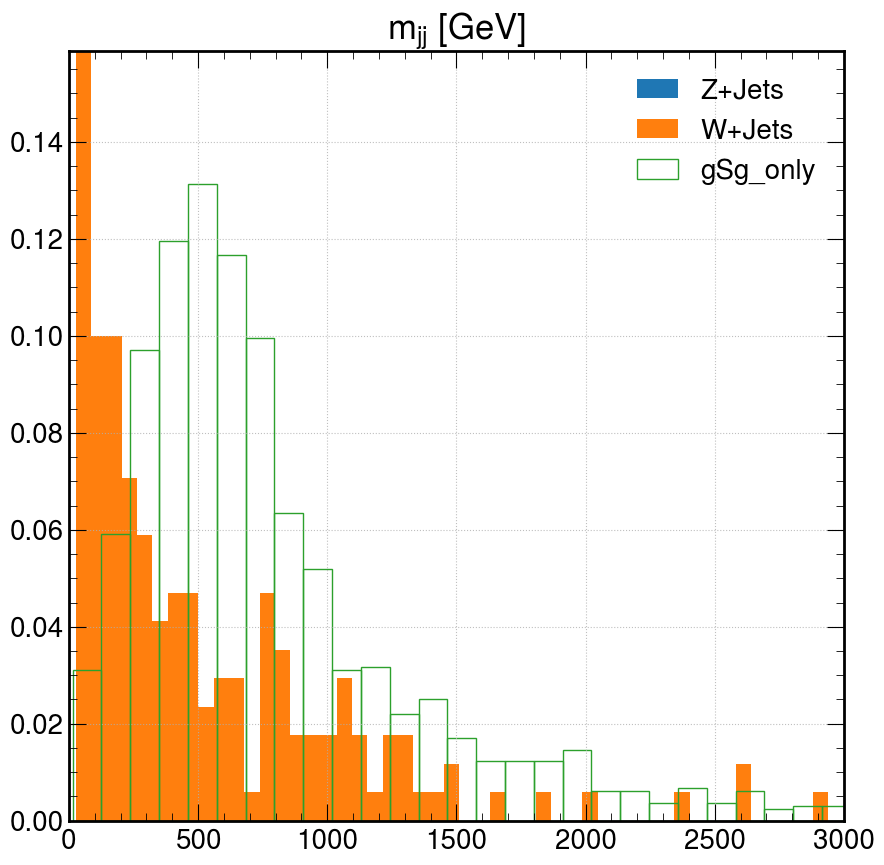

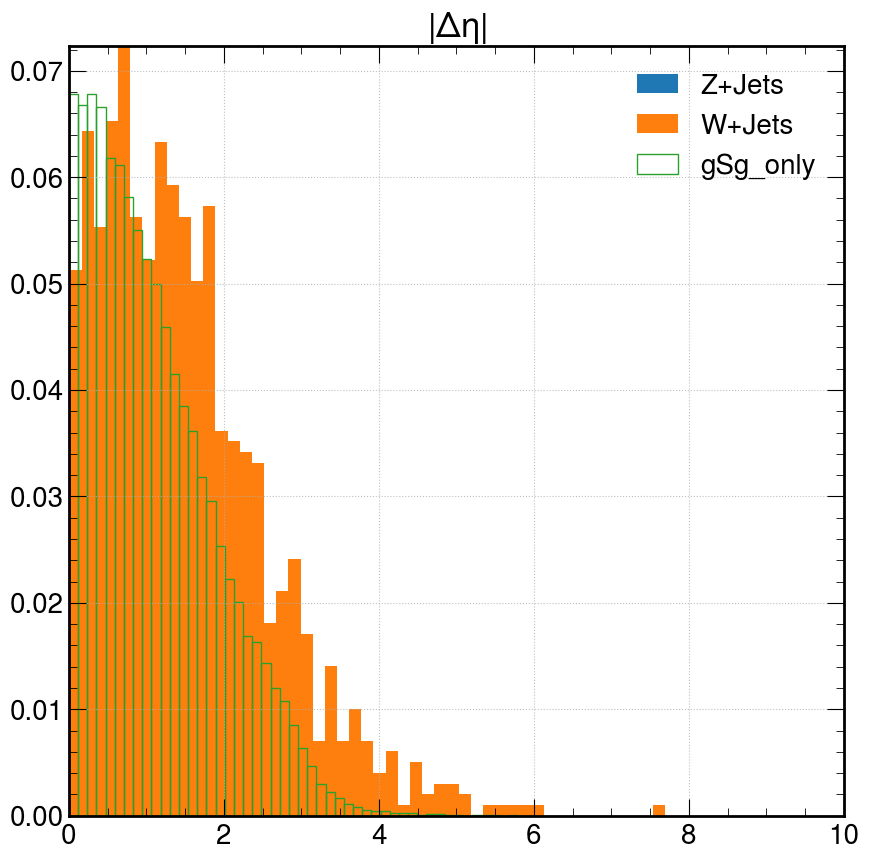

In [50]:
datas = [dataWpJ_cut1['gSg_only'][0], dataWpJ_cut1['gSg_only'][0], cut_data1['gSg_only'][0]]
names = ['Z+Jets','W+Jets','gSg_only']
plotObservable(datas, names, 'Azim_diff', save=False, plot=True)
plotObservable(datas, names, 'Inv_mass', save=False, plot=True)
plotObservable(datas, names, 'Pseudorapidity', save=False, plot=True)

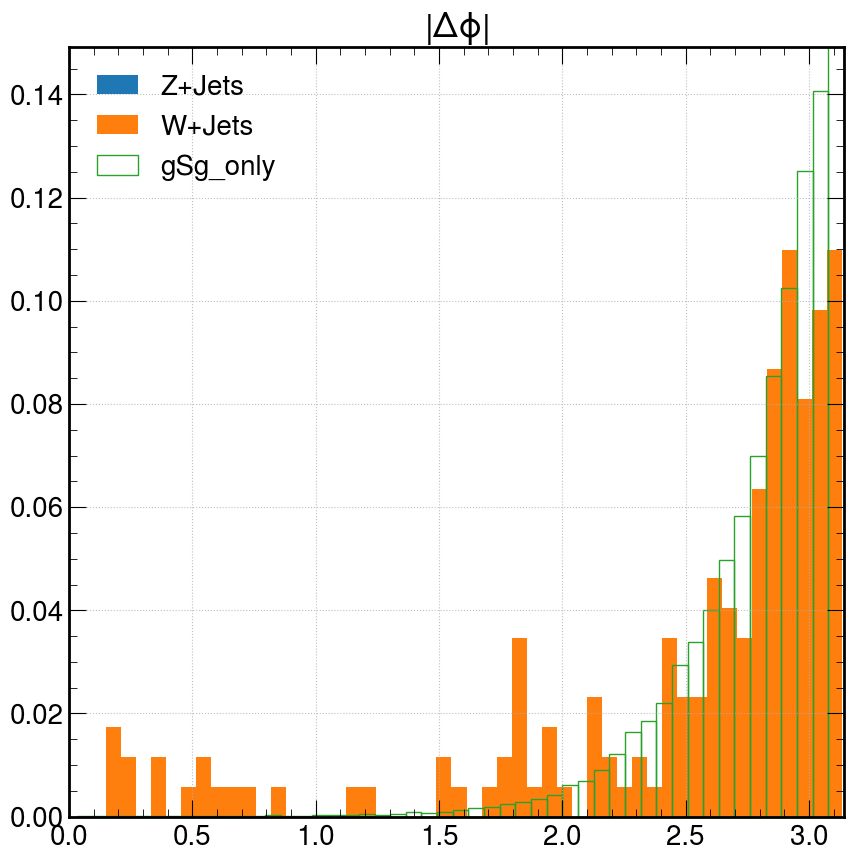

/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \
/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:102: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(2 * row['jet_pt0'] * row['jet_pt1'] * \


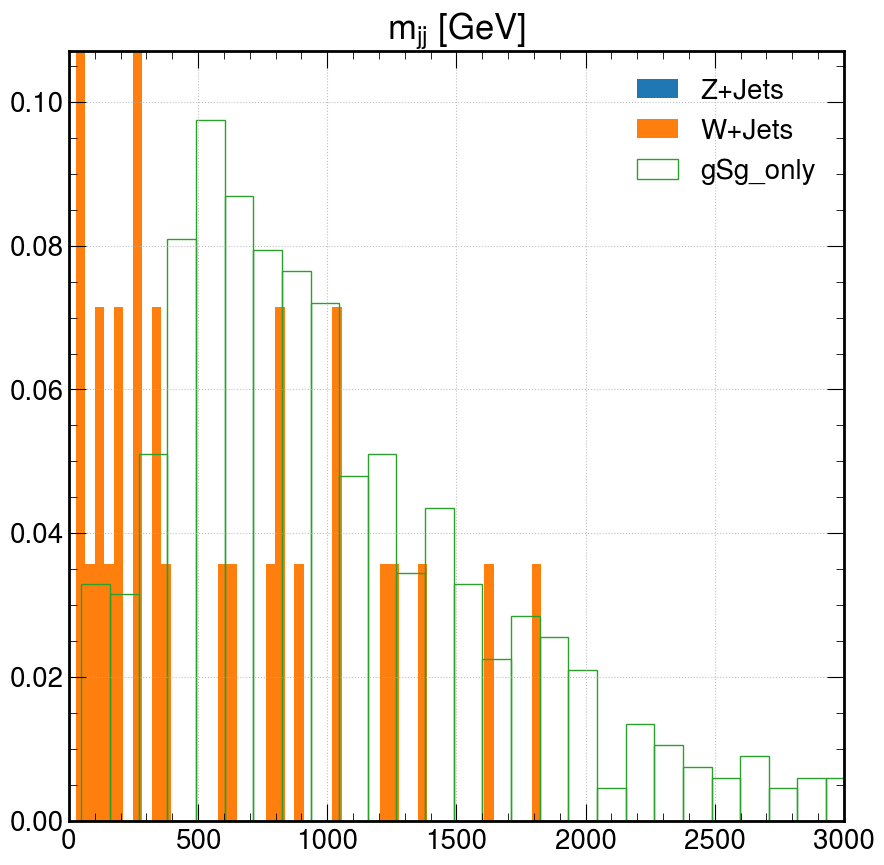

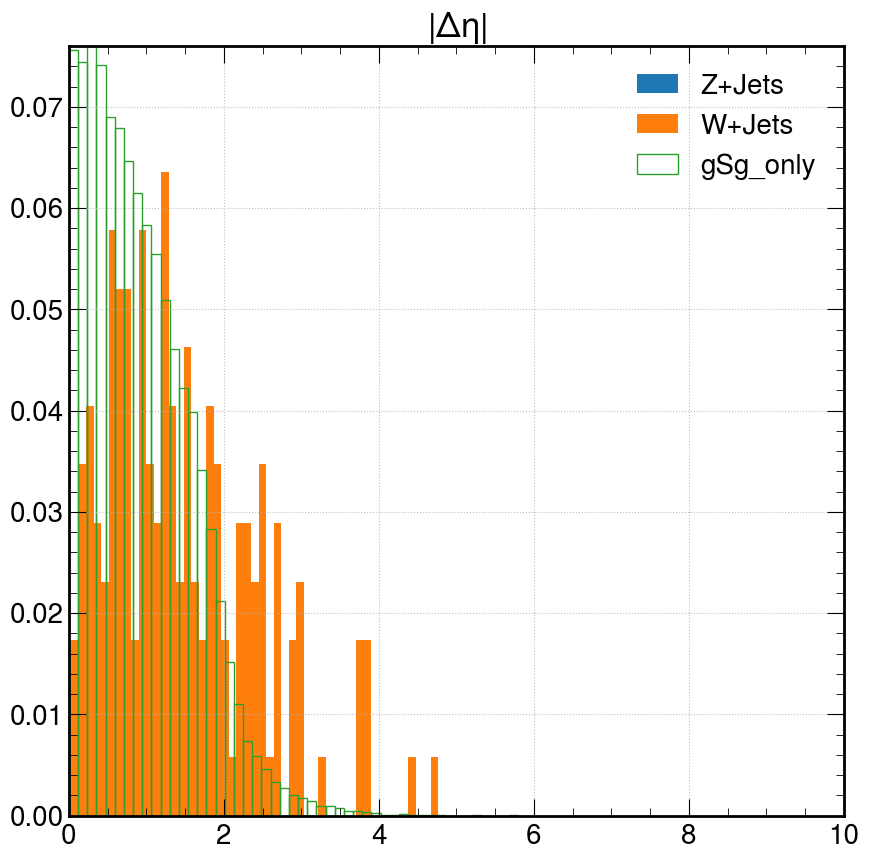

In [51]:
datas = [dataWpJ_cut2['gSg_only'][0], dataWpJ_cut2['gSg_only'][0], cut_data2['gSg_only'][0]]
names = ['Z+Jets','W+Jets','gSg_only']
plotObservable(datas, names, 'Azim_diff', save=False, plot=True)
plotObservable(datas, names, 'Inv_mass', save=False, plot=True)
plotObservable(datas, names, 'Pseudorapidity', save=False, plot=True)